# Handling Categorical Data

## Libraries

In [2]:
import pandas as pd
import numpy as np
import copy

import seaborn as sns
import matplotlib.pyplot as plt

## Database

In [3]:
df_flights = pd.read_csv('../Datasets/flights.csv')
df_flights.sample(10)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
112401,2014,6,22,1357.0,10.0,1612.0,3.0,B6,N746JB,1521,PDX,LGB,117.0,846,13.0,57.0
55166,2014,2,12,1220.0,15.0,1351.0,11.0,WN,N293WN,478,SEA,RNO,75.0,564,12.0,20.0
65831,2014,3,11,820.0,0.0,1001.0,-4.0,WN,N219WN,2618,PDX,OAK,82.0,543,8.0,20.0
115637,2014,6,28,2104.0,9.0,2331.0,7.0,B6,N793JB,907,SEA,ANC,185.0,1448,21.0,4.0
111289,2014,6,20,954.0,9.0,1204.0,10.0,AS,N618AS,394,SEA,SFO,104.0,679,9.0,54.0
99887,2014,5,28,605.0,-5.0,750.0,-5.0,WN,N552WN,1015,PDX,SJC,87.0,569,6.0,5.0
151029,2014,9,6,1004.0,0.0,1338.0,5.0,F9,N933FR,788,PDX,DEN,128.0,991,10.0,4.0
131572,2014,7,30,855.0,0.0,1130.0,2.0,US,N648AW,507,PDX,PHX,135.0,1009,8.0,55.0
125966,2014,7,19,929.0,-6.0,1212.0,-13.0,OO,N216AG,3466,PDX,TUS,147.0,1119,9.0,29.0
134948,2014,8,5,1512.0,-3.0,1711.0,-8.0,AS,N323AS,376,SEA,SFO,100.0,679,15.0,12.0


In [4]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       162049 non-null  int64  
 1   month      162049 non-null  int64  
 2   day        162049 non-null  int64  
 3   dep_time   161192 non-null  float64
 4   dep_delay  161192 non-null  float64
 5   arr_time   161061 non-null  float64
 6   arr_delay  160748 non-null  float64
 7   carrier    162049 non-null  object 
 8   tailnum    161801 non-null  object 
 9   flight     162049 non-null  int64  
 10  origin     162049 non-null  object 
 11  dest       162049 non-null  object 
 12  air_time   160748 non-null  float64
 13  distance   162049 non-null  int64  
 14  hour       161192 non-null  float64
 15  minute     161192 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.8+ MB


<AxesSubplot:title={'center':'dep_time'}, xlabel='origin'>

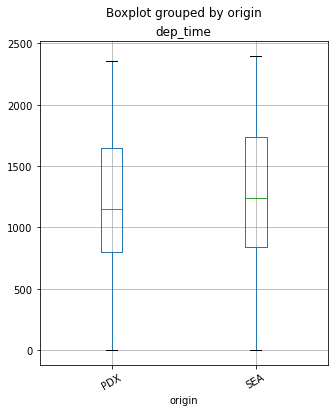

In [3]:
df_flights.boxplot('dep_time','origin',rot = 30,figsize=(5,6))

<ul>
 <li>Separating <i>Categorical Variables</i> in a different database.</li>
</ul>

In [6]:
cat_df_flights = df_flights.select_dtypes(include = ['object']).copy()
cat_df_flights.sample(5)

,carrier,tailnum,origin,dest
49145,AA,N3HPAA,SEA,JFK
39497,AA,N3HEAA,SEA,DFW
52466,WN,N768SW,SEA,OAK
138574,WN,N478WN,PDX,MDW
34615,WN,N200WN,SEA,SMF


<ul>
 <li>Checking for null values in <i>cat_df_flights</i> database.</li>
</ul>

In [7]:
cat_df_flights.isnull().values.sum(axis = 0)

array([  0, 248,   0,   0])

<ul>
 <li>Imputing the most frequent value to the null-values in <i>tailnum</i> variable.</li>
</ul>

In [9]:
cat_df_flights.fillna(cat_df_flights['tailnum'].value_counts().index[0],inplace= True)

<ul>
 <li>Checking for null values again to verify if they were correctly imputed.</li>
</ul>

In [10]:
cat_df_flights.isnull().values.sum(axis = 0)

array([0, 0, 0, 0])

<ul>
 <li>Barplot with Frequency Distribution of <i>carrier</i> variable.</li>
</ul>

/home/pimarlon21/anaconda3/envs/py/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


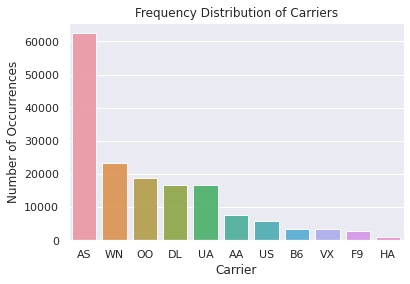

In [30]:
carrier_count = cat_df_flights['carrier'].value_counts()

sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)

plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

<ul>
 <li>Pie Chart with <i>carrier</i> variable.</li>
</ul>

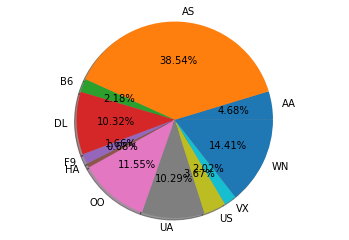

In [22]:
from cProfile import label


labels = cat_df_flights['carrier'].astype('category').cat.categories.tolist()
counts = cat_df_flights['carrier'].value_counts()
sizes = [counts[var] for var in labels]

fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, autopct = '%1.2f%%', shadow = True)
ax.axis('equal')
plt.show()

## Encoding Categorical Data

### Replacing Values

In [24]:
replace_map = {'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4,'F9': 5, 'HA': 6, 'OO': 7 , 'UA': 8 , 'US': 9,'VX': 10,'WN': 11}}
replace_map

{'carrier': {'AA': 1,
  'AS': 2,
  'B6': 3,
  'DL': 4,
  'F9': 5,
  'HA': 6,
  'OO': 7,
  'UA': 8,
  'US': 9,
  'VX': 10,
  'WN': 11}}

In [30]:
labels = cat_df_flights.carrier.astype('category').cat.categories.tolist()
replace_map_comp = {'carrier': {k: v for k, v in zip(labels,list(range(1,len(labels) + 1)))}}

replace_map_comp

{'carrier': {'AA': 1,
  'AS': 2,
  'B6': 3,
  'DL': 4,
  'F9': 5,
  'HA': 6,
  'OO': 7,
  'UA': 8,
  'US': 9,
  'VX': 10,
  'WN': 11}}

In [31]:
cat_df_flights_replace = cat_df_flights.copy()

In [33]:
cat_df_flights_replace.replace(replace_map_comp, inplace = True)
cat_df_flights_replace.sample(5)

,carrier,tailnum,origin,dest
129720,2,N524AS,SEA,PHX
108291,2,N625AS,SEA,LAX
117362,11,N670SW,SEA,LAS
95111,2,N625AS,PDX,SFO
128777,7,N216AG,SEA,COS


In [34]:
cat_df_flights_lc = cat_df_flights.copy()
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].astype('category')
cat_df_flights_lc['origin'] = cat_df_flights_lc['origin'].astype('category') 

In [35]:
cat_df_flights_lc.dtypes

carrier    category
tailnum      object
origin     category
dest         object
dtype: object

In [36]:
import time
%timeit cat_df_flights.groupby(['origin','carrier']).count() # DataFrame with object dtype columns

43.6 ms ± 518 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [37]:
%timeit cat_df_flights_lc.groupby(['origin','carrier']).count() #DataFrame with category dtype columns

35 ms ± 464 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Label Encoding

<ul>
 <li>Label encoding via attributes.</li>
</ul>

In [40]:
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].cat.codes
cat_df_flights_lc.sample(5)

,carrier,tailnum,origin,dest
145612,1,N705AS,SEA,JNU
22220,3,N703TW,SEA,JFK
21554,1,N769AS,SEA,SMF
57081,1,N756AS,SEA,JNU
121906,8,N806AW,SEA,PHL


<ul>
 <li>Label encoding within a feature to some numeric value and encode all the other categories to some other numeric value.</li>
</ul>

In [41]:
cat_df_flights_specific = cat_df_flights.copy()

In [46]:
cat_df_flights_specific['US_code'] = np.where(cat_df_flights_specific['carrier'].str.contains('US'),1,0)
cat_df_flights_specific.sample(5)

,carrier,tailnum,origin,dest,US_code
76372,US,N150UW,SEA,CLT,1
91555,F9,N905FR,PDX,DEN,0
36094,AS,N534AS,SEA,KOA,0
49481,AS,N527AS,SEA,BOS,0
64497,B6,N554JB,SEA,BOS,0


<ul>
 <li>Label encoding using scikit-learn's <i>LabelEncoder.</i></li>
</ul>

In [47]:
cat_df_flights_sklearn = cat_df_flights.copy()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_df_flights_sklearn['carrier_code'] = le.fit_transform(cat_df_flights['carrier'])
cat_df_flights_sklearn.sample(5) #Results in appending a new column to df

,carrier,tailnum,origin,dest,carrier_code
103822,WN,N711HK,PDX,SJC,10
49821,AS,N713AS,SEA,ANC,1
28754,WN,N489WN,SEA,OAK,10
78006,AS,N626AS,SEA,LAS,1
135700,UA,N36447,PDX,IAH,7


### One-Hot encoding

<ul>
 <li>One-Hot encoding using <i>get_dummies()</i> method.</li>
</ul>

In [49]:
cat_df_flights_onehot = cat_df_flights.copy()
cat_df_flights_onehot = pd.get_dummies(cat_df_flights_onehot, columns=['carrier'], prefix = ['carrier'])

cat_df_flights_onehot.sample(5)

,tailnum,origin,dest,carrier_AA,carrier_AS,carrier_B6,carrier_DL,carrier_F9,carrier_HA,carrier_OO,carrier_UA,carrier_US,carrier_VX,carrier_WN
12669,N666DN,SEA,SLC,0,0,0,1,0,0,0,0,0,0,0
56603,N614AS,SEA,BUR,0,1,0,0,0,0,0,0,0,0,0
154612,N453UA,SEA,ORD,0,0,0,0,0,0,0,1,0,0,0
128903,N69824,SEA,SFO,0,0,0,0,0,0,0,1,0,0,0
158309,N626AS,PDX,SFO,0,1,0,0,0,0,0,0,0,0,0


<ul>
 <li>One-Hot encoding using <i>LabelBinarizer</i> o <i>OneHotEncoder</i> method.</li>
</ul>

In [52]:
cat_df_flights_onehot_sklearn = cat_df_flights.copy()

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(cat_df_flights_onehot_sklearn['carrier'])
lb_results_df = pd.DataFrame(lb_results, columns = lb.classes_)

lb_results_df.sample(5)

,AA,AS,B6,DL,F9,HA,OO,UA,US,VX,WN
50565,0,0,0,0,0,0,0,0,0,0,1
130519,0,0,0,1,0,0,0,0,0,0,0
22940,0,1,0,0,0,0,0,0,0,0,0
120902,0,1,0,0,0,0,0,0,0,0,0
30406,0,0,0,0,0,0,0,0,0,0,1


In [54]:
result_df = pd.concat([cat_df_flights_onehot_sklearn, lb_results_df], axis=1)
result_df.sample(5)

,carrier,tailnum,origin,dest,AA,AS,B6,DL,F9,HA,OO,UA,US,VX,WN
3324,AS,N625AS,SEA,SNA,0,1,0,0,0,0,0,0,0,0,0
135827,AS,N537AS,SEA,LIH,0,1,0,0,0,0,0,0,0,0,0
45141,AS,N760AS,PDX,ANC,0,1,0,0,0,0,0,0,0,0,0
96539,AS,N320AS,PDX,PSP,0,1,0,0,0,0,0,0,0,0,0
43084,UA,N820UA,PDX,SFO,0,0,0,0,0,0,0,1,0,0,0


### Binary Encoding

<ul>
 <li><i>BinaryEncoder</i> function from <i>category_encoders</i> library.</li>
</ul>

In [62]:
cat_df_flights_ce = cat_df_flights.copy()

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['carrier'])
df_binary = encoder.fit_transform(cat_df_flights_ce)

df_binary.sample(5)

,carrier_0,carrier_1,carrier_2,carrier_3,tailnum,origin,dest
35575,1,0,0,1,N714CB,SEA,PHX
85302,0,0,1,0,N667AW,SEA,PHL
15605,1,0,0,1,N943WN,PDX,SMF
10895,0,0,0,1,N538AS,SEA,HNL
21533,0,0,1,1,N458UA,PDX,SFO


###  Backward Difference Encoding

In [66]:
encoder = ce.BackwardDifferenceEncoder(cols=['carrier'])
df_bd = encoder.fit_transform(cat_df_flights_ce)

df_bd.sample(10)

/home/pimarlon21/anaconda3/envs/py/lib/python3.10/site-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",
/home/pimarlon21/anaconda3/envs/py/lib/python3.10/site-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


,intercept,carrier_0,carrier_1,carrier_2,carrier_3,carrier_4,carrier_5,carrier_6,carrier_7,carrier_8,carrier_9,tailnum,origin,dest
96973,1,-0.909091,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N419AS,SEA,FAI
136404,1,0.090909,0.181818,0.272727,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N682DA,PDX,SLC
59026,1,-0.909091,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N564AS,SEA,MCO
19599,1,0.090909,0.181818,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N64809,PDX,IAH
146530,1,0.090909,0.181818,0.272727,0.363636,0.454545,0.545455,0.636364,0.727273,-0.181818,-0.090909,N904WN,SEA,DEN
134442,1,0.090909,0.181818,0.272727,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N3735D,SEA,LAX
83434,1,-0.909091,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N457AS,PDX,BOS
126299,1,0.090909,0.181818,0.272727,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N818DA,SEA,ATL
48266,1,-0.909091,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N764AS,SEA,JNU
21635,1,-0.909091,-0.818182,-0.727273,-0.636364,-0.545455,-0.454545,-0.363636,-0.272727,-0.181818,-0.090909,N760AS,SEA,KTN


### Miscellaneous Features

In [80]:
dummy_df_age = pd.DataFrame({'age': ['0-20', '20-40', '40-60','60-80']})
dummy_df_age['start'], dummy_df_age['end'] = zip(*dummy_df_age['age'].map(lambda x: x.split('-')))

dummy_df_age.head()

,age,start,end
0,0-20,0,20
1,20-40,20,40
2,40-60,40,60
3,60-80,60,80


In [81]:
def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0])+float(split_list[1]))/2
    return mean

dummy_df_age['age_mean'] = dummy_df_age['age'].apply(lambda x: split_mean(x))

dummy_df_age.head()

,age,start,end,age_mean
0,0-20,0,20,10.0
1,20-40,20,40,30.0
2,40-60,40,60,50.0
3,60-80,60,80,70.0
